## Data Science Bootcamp

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 231](#1)
* [Ćwiczenie 232](#2)
* [Ćwiczenie 233](#3)
* [Ćwiczenie 234](#4)
* [Ćwiczenie 235](#5)
* [Ćwiczenie 236](#6)
* [Ćwiczenie 237](#7)
* [Ćwiczenie 238](#8)
* [Ćwiczenie 239](#9)
* [Ćwiczenie 240](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd

np.__version__

'1.21.6'

### <a name='1'></a> Ćwiczenie 231
Zaimportuj bibliotekę _tensorflow_ w wersji 2.x.

In [2]:
%tensorflow_version 2.x
import tensorflow as tf

tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.8.2'

Załaduj dane Fashion MNIST wykorzystując bibliotekę _tensorflow_. Odpowiednio zbiór treningowy (_X\_train_, _y\_train_) oraz testowy (_X\_test_, _y\_test_).

In [3]:
from tensorflow.keras.datasets.fashion_mnist import load_data

(X_train, y_train), (X_test, y_test) = load_data()

4431872/4422102 [==============================] - 0s 0us/step


Sprawdź rozmiar zbiorów treningowych i testowych.

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### <a name='2'></a> Ćwiczenie 232 
Wykorzytując bibliotekę _matplotlib_ wyświetl obraz ze zbioru treningowego z indeksem 40.

(-0.5, 27.5, 27.5, -0.5)

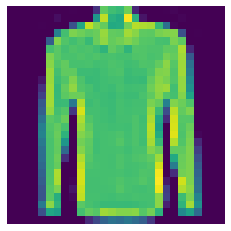

In [8]:
import matplotlib.pyplot as plt
plt.imshow(X_train[40])
plt.axis('off')

Wyświetl numer klasy dla próbki ze zbioru treningowego z ineksem 40.

In [9]:
y_train[40]

6

### <a name='3'></a> Ćwiczenie 233
Wystandaryzuj dane. Podziel wartości tablic _X\_train_ oraz _X\_test_ przez wartość 255.0.

In [10]:
X_train = X_train/255.
X_test = X_test/255.

### <a name='4'></a> Ćwiczenie 234
Zaimportuj klasę _Sequential_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [11]:
from tensorflow.keras.models import Sequential

Zaimportuj warstwy _Flatten_ oraz _Dense_ z biblioteki _tensorflow_ wykorzystując pakiet _keras_.

In [12]:
from tensorflow.keras.layers import Dense, Flatten

### <a name='5'></a> Ćwiczenie 235
Zbuduj model klasy _Sequential_.

In [13]:
model = Sequential()

Dodaj pierwszą warstwę typu _Flatten_ wraz z odpowiednio dobranym parametrem _input_shape_.

In [14]:
model.add(Flatten(input_shape=(28,28)))

Dodaj kolejną warstwę typu _Dense_ z 128 neuronami i funkcją aktywacji _relu_.

In [15]:
model.add(Dense(units=128, activation='relu'))

Dodaj ostatnią warstwę typu _Dense_ z 10 neuronami i funkcją aktywacji _softmax_.

In [16]:
model.add(Dense(units=10, activation='softmax'))

Wyświetl podsumowanie modelu.

In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### <a name='6'></a> Ćwiczenie 236
Skompiluj model. Wykorzystaj optymalizator _rmsprop_, funkcję straty _sparse_categorical_crossentropy_ oraz metrykę _accuracy_.

In [19]:
model.compile(optimizer='rmsprop',
	      loss='sparse_categorical_crossentropy',
	      metrics=['accuracy'])

### <a name='7'></a> Ćwiczenie 237
Dopasuj model do danych treningowych, ustawiając 10 epok oraz podział na zbiór walidacyjny wynoszący 0.2.

In [20]:
model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5259 - accuracy: 0.8140 - val_loss: 0.4659 - val_accuracy: 0.8321
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3873 - accuracy: 0.8611 - val_loss: 0.3845 - val_accuracy: 0.8680
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3513 - accuracy: 0.8730 - val_loss: 0.4241 - val_accuracy: 0.8551
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3308 - accuracy: 0.8816 - val_loss: 0.3560 - val_accuracy: 0.8801
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3144 - accuracy: 0.8877 - val_loss: 0.3822 - val_accuracy: 0.8806
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3043 - accuracy: 0.8913 - val_loss: 0.3539 - val_accuracy: 0.8853
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2966 - accuracy: 0.8948 - val_loss: 0.4226 - val_accuracy:

### <a name='8'></a> Ćwiczenie 238
Dokonaj predykcji modelu na podstawie danych testowych.

In [22]:
X_pred = model.predict(X_test)
X_pred = np.argmax(X_pred, axis=1)
X_pred

array([9, 2, 1, ..., 8, 1, 5])

Zbuduj macierz konfuzji (macierz pomyłek).

(-0.5, 9.5, 9.5, -0.5)

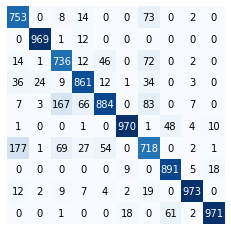

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(X_pred, y_test)
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cm)
plt.axis('off')

### <a name='9'></a> Ćwiczenie 239
Zbuduj obiekt pandas _DataFrame_ zawierający predykcje modelu. Nadaj nazwę kolumny _prediction_ i przypisz do zmiennej _results_.

In [27]:
results = pd.DataFrame(X_pred, columns=['prediction'])
results.head()

,prediction
0,9
1,2
2,1
3,1
4,6


Przypisz nową kolumnę z wartościami ze zmiennej _y\_test_ i nazwij ją _y\_test_.

In [28]:
results['y_test'] = y_test
results.head()

,prediction,y_test
0,9,9
1,2,2
2,1,1
3,1,1
4,6,6


Przypisz nową kolumnę o nazwie _is_misclassified_, która zwróci 1, gdy próbki zostaną błędnie sklasyfikowane, w przeciwnym przypadku 0.

In [33]:
results['is_misclassified'] = (results['y_test'] != results['prediction']).astype('int')
results

,prediction,y_test,is_misclassified
0,9,9,0
1,2,2,0
2,1,1,0
3,1,1,0
4,6,6,0
...,...,...,...
9995,9,9,0
9996,1,1,0
9997,8,8,0
9998,1,1,0


In [34]:
results[results['is_misclassified']==1]

,prediction,y_test,is_misclassified
12,5,7,1
17,2,4,1
23,5,9,1
25,2,4,1
29,4,3,1
...,...,...,...
9955,0,6,1
9961,2,6,1
9972,6,2,1
9977,0,6,1


### <a name='10'></a> Ćwiczenie 240
Zapisz obiekt _results_ do pliku _results.csv_.

In [37]:
results.to_csv('results.csv',index=False)

In [38]:
!head results.csv

prediction,y_test,is_misclassified
9,9,0
2,2,0
1,1,0
1,1,0
6,6,0
1,1,0
4,4,0
6,6,0
5,5,0
